# Pre Owned Cars - Data Wrangling and Analysis. 

**Author:** Neeva K Thomas  
**Project:** Data Wrangling and Preparation  
**Dataset:** Pre Owned Cars Dataset  
**Language** Python    
**Tools:** Python, Numpy, Pandas, Matplotlib 

**Project Objective:
The goal of this project is to analyze pre-owned car data to identify key factors influencing pricing, including age, mileage, fuel type, engine capacity, ownership history, and other vehicle attributes.**

<h4 style="color:green">In this notebook, I will perform Data importing, cleaning, transformation, Feature Engineering and exploratory analysis on Pre Owned Cars Dataset to prepare it for further exploration. </h4>

### 1.Importing Libraries
<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4 style="color:red">Loading the Dataset. </h4>

In [4]:
df=pd.read_csv('pre-owned cars.csv')
df.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL



### 2.Data Inspection
<br>

In [6]:
print(df.shape)
print()

df.info()
print()

df.isna().sum()

(2806, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), o

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2086
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64

<p style="color:green">From the dataset info, we can see that reg_year has 2086 missing entries, which is more than 70% of the entire dataset. Since it cannot be reliably imputed, we will drop this column. The engine_capacity(CC) column has 118 missing values, The engine_capacity(CC) column has 118 missing values, and since this is a numeric feature with potential outliers, we will fill these using the median to maintain distribution stability. Other columns have only one missing entry each, which likely correspond to a single incomplete record, so dropping that row is an acceptable approach.</p>

### 3. Data Cleaning

<h4 style="color:red">Dropping null values</h4>

In [8]:
# Dropping column: reg_year
df.drop(columns=['reg_year'], inplace=True)
df.columns

Index(['brand', 'model', 'transmission', 'make_year', 'fuel_type',
       'engine_capacity(CC)', 'km_driven', 'ownership', 'price',
       'overall_cost', 'has_insurance', 'spare_key', 'reg_number', 'title'],
      dtype='object')

In [11]:
#filling engine_capacity column with their mode
df['engine_capacity(CC)']=df['engine_capacity(CC)'].fillna(df['engine_capacity(CC)'].median())

#dropping all the single null values from each column
df.dropna(inplace=True)

df.isna().sum()

brand                  0
model                  0
transmission           0
make_year              0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
reg_number             0
title                  0
dtype: int64

<p style="color:green">This confirms that all missing values have been successfully handled and the dataset is now fully cleaned of null entries.</p>

<h4 style="color:red">Fixing column formatting</h4>

In [13]:
df['brand'].unique()

array(['Mahindra', 'Hyundai', 'Tata', 'Honda', 'Ford', 'Maruti', 'KIA',
       'MG', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Toyota',
       'Datsun', 'Jeep'], dtype=object)

In [14]:
df['model'].unique()

array(['Thar LX D 4WD MT CONVERTIBLE', 'Verna 1.6 VTVT SX',
       'Harrier XT PLUS 2.0L KRYOTEC DARK EDITON',
       'City 1.5L I-VTE V CVT', 'Ecosport TITANIUM 1.5L DIESEL',
       'WR-V 1.2L I-VTEC VX MT', 'PUNCH CREATIVE  1.2 RTN DUAL TONE',
       'NEXON XMA DIESEL', 'XUV700 AX 7 LUXURY D AWD AT 7 STR',
       'Ecosport TITANIUM + 1.5L PETROL AT', 'Dzire LXI',
       'GRAND I10 NIOS SPORTZ 1.2 KAPPA VTVT', 'Tiago XE PETROL',
       'Creta E PLUS 1.6 PETROL', 'Alto K10 VXI', 'Verna 1.6 CRDI SX',
       'Alto K10 VXI AMT', 'Amaze 1.2L I-VTEC S', 'SELTOS HTE 1.5 DIESEL',
       'GRAND I10 NIOS ASTA 1.2 KAPPA VTVT',
       'HECTOR SHARP 1.5 PETROL CVT', 'TIGOR XM PETROL',
       'City 1.5L I-VTEC ZX CVT', 'Verna SX 1.5 CRDI',
       'FREESTYLE TITANIUM PLUS 1.2 PETROL', 'Ciaz S 1.5 MT PETROL',
       'Tiago XZ PLUS CNG', 'Dzire ZXI PLUS', 'Alto LXI O',
       'Celerio VXI AMT', 'CARENS LUXURY PLUS 1.5 DIESEL AT 7 STR',
       'IGNIS DELTA 1.2', 'TRIBER RXL MT',
       'Ecosport TITANI

In [16]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'Electric'], dtype=object)

In [20]:
df['ownership'].unique()

array(['1st owner', '2nd owner', '3rd owner'], dtype=object)

In [22]:
df['has_insurance'].unique()

array([True], dtype=object)

In [24]:
df['spare_key'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['reg_number'].unique()

array(['HR26', 'DL7C', 'HR29', 'DL4C', 'UP14', 'UP32', 'DL3C', 'DL5C',
       'DL10', 'DL9C', 'HR51', 'DL11', 'HR98', 'DL12', 'HR76', 'DL8C',
       'HR36', 'DL1C', 'DL2C', 'HR12', 'HR87', 'DL14', 'HR30', 'HR70',
       'UP25', 'HR05', 'HR31', 'UP16', 'HR16', 'HR10', 'DL6C', 'HR81',
       'UP66', 'DL13', 'UP37', 'HR50', 'HR72', 'HR06', 'HR35', 'HR13',
       'HR08', 'HR42', 'HR14', 'HR34', 'UP81', 'UP65', 'HR52', 'HR49',
       'HR20', 'HR03', 'UP78', 'DL7G', 'UP85', 'KA53', 'KA51', 'KA03',
       'KA50', 'KA41', 'KA04', 'KA01', 'KA05', 'KA18', 'KA25', 'KA09',
       'KA33', 'KA22', 'KA19', 'KA14', 'KA02', 'KA63', 'KA17', 'KA28',
       'KA43', 'KA06', 'KA34', 'KA20', 'KA21', 'KA08', 'KA52', 'KA11',
       'KA27', 'KA13', 'KA36', 'KA42', 'KA26', 'KA30', 'KA68', 'KA59',
       'KA32', 'WB02', 'KA70', 'KA39', 'KA55', 'KA40', 'KA12', 'KA35',
       'KA07', 'KA23', 'KA24', 'WB56', 'TS07', 'TS08', 'AP10', 'TS12',
       'TS09', 'TS11', 'TS15', 'TS10', 'TS13', 'AP28', 'AP27', 'AP21',
      

In [25]:
df['title'].unique()

array(['2020 Mahindra Thar LX D 4WD MT CONVERTIBLE',
       '2018 Hyundai Verna 1.6 VTVT SX',
       '2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK EDITON', ...,
       '2016 Mahindra TUV300 T8 AMT',
       '2024 Tata NEXON FEARLESS + SUNROOF DCA DUAL TONE 1.2 PETROL',
       '2018 Ford Ecosport TREND + 1.5L PETROL AT'],
      shape=(1530,), dtype=object)

In [28]:
cols=['brand', 'model', 'transmission','fuel_type',
      'ownership','has_insurance', 'spare_key', 'reg_number', 'title']

for col in cols:
    df[col]=df[col].astype(str).str.strip().str.lower()

In [30]:
df['fuel_type'].unique()

array(['diesel', 'petrol', 'cng', 'electric'], dtype=object)

In [32]:
df['ownership'].unique()

array(['1st owner', '2nd owner', '3rd owner'], dtype=object)

In [34]:
df['transmission'].unique()

array(['manual', 'automatic'], dtype=object)

In [36]:
df['has_insurance'].unique()

array(['true'], dtype=object)

In [38]:
df['spare_key'].unique()

array(['no', 'yes'], dtype=object)

<p style="color:green">From the unique value inspection, all categorical columns such as fuel_type, ownership, transmission, spare_key appear well formatted and consistent, so no extra category unification is required.<br>
We also noticed that 'has_insurance' and 'reg_number' columns contain only a single unique value across all rows, which means they provide no variation or useful information for analysis. Therefore, these columns do not contribute meaningful insights and can be safely dropped from the dataset.</p>


In [40]:
df.drop(columns=['has_insurance','reg_number'],inplace=True)
df.columns

Index(['brand', 'model', 'transmission', 'make_year', 'fuel_type',
       'engine_capacity(CC)', 'km_driven', 'ownership', 'price',
       'overall_cost', 'spare_key', 'title'],
      dtype='object')

<p style="color:green">The unnecessary columns were dropped and the dataset is now cleaner and more focused for analysis.
Since all categorical columns are now properly cleaned, stripped, lowercased, and consistent, we can now proceed to the Feature Engineering step.</p>


<h4 style="color:red">Feature Engineering</h4>

<p style="color:green">Since the price of a used car strongly depends on how much distance it has been driven, we introduce a new feature called cost_per_km, which represents the amount of money paid per kilometer driven. This allows us to compare real value across cars regardless of price and mileage differences.</p>


In [42]:
df['cost_per_km']=df['price']/df['km_driven'].replace(0,np.nan)

<p style="color:green">Car age plays an important role in determining resale price. Newer cars retain more value, while older cars depreciate faster. Therefore, we create a new feature called car_age based on the manufacturing year.</p>


In [44]:
df['car_age']=2025-df['make_year']

<p style="color:green">We extract the number of previous owners as a numeric feature since ownership history affects resale price. A single-owner car is typically preferred over multiple-owner vehicles.</p>


In [46]:
df['owner_count'] = df['ownership'].map({
    "1st owner": 1,
    "2nd owner": 2,
    "3rd owner": 3
}).astype('Int64')

<p style="color:green">Engine capacity plays a significant role in a car’s performance, cost, and resale value. Larger engines typically indicate more power and higher pricing, while smaller engines tend to be more economical. 
To make the raw engine capacity values easier to interpret, we categorize them into four groups: <b>small, mid, large, and premium</b> based on CC range. 
</p>

In [48]:
df['engine category']=pd.cut(
    df['engine_capacity(CC)'],
    bins=[0,1000,1500,2000,5000],
    labels=['small','mid','large','premium'])

In [50]:
df.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,spare_key,title,cost_per_km,car_age,owner_count,engine category
0,mahindra,thar lx d 4wd mt convertible,manual,2020.0,diesel,2184.0,11003.0,1st owner,1231000,23431.0,no,2020 mahindra thar lx d 4wd mt convertible,111.878579,5.0,1,premium
1,hyundai,verna 1.6 vtvt sx,manual,2018.0,petrol,1591.0,66936.0,1st owner,786000,15359.0,no,2018 hyundai verna 1.6 vtvt sx,11.742560,7.0,1,large
2,tata,harrier xt plus 2.0l kryotec dark editon,manual,2022.0,diesel,1956.0,27990.0,1st owner,1489000,28349.0,no,2022 tata harrier xt plus 2.0l kryotec dark ed...,53.197571,3.0,1,large
3,honda,city 1.5l i-vte v cvt,automatic,2023.0,petrol,1498.0,5061.0,1st owner,1227000,23355.0,yes,2023 honda city 1.5l i-vte v cvt,242.442205,2.0,1,mid
4,ford,ecosport titanium 1.5l diesel,manual,2021.0,diesel,1498.0,23480.0,1st owner,887000,16883.0,no,2021 ford ecosport titanium 1.5l diesel,37.776831,4.0,1,mid


<p style="color:green">Dropping has_insurance as it contains only a single value. So it doesn't contribute much to the analysis. </p>

In [ ]:
df.drop(columns="has_insurance", inplace=True)
df.columns

<h4 style="color:red">Encoding Categorical Variables</h4>

To make categorical data usable for analysis and modeling, we convert categories such as fuel type, transmission, and engine category into numerical representations using one-hot encoding. 

In [56]:
df=pd.get_dummies(df,columns=['transmission','fuel_type','engine category'],drop_first=True)

<p style="color:green">We only applied one-hot encoding to fuel_type, transmission, engine_category since they contain meaningful and limited categories.</p>


In [58]:
df.head()

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,overall_cost,spare_key,title,cost_per_km,car_age,owner_count,transmission_manual,fuel_type_diesel,fuel_type_electric,fuel_type_petrol,engine category_mid,engine category_large,engine category_premium
0,mahindra,thar lx d 4wd mt convertible,2020.0,2184.0,11003.0,1st owner,1231000,23431.0,no,2020 mahindra thar lx d 4wd mt convertible,111.878579,5.0,1,True,True,False,False,False,False,True
1,hyundai,verna 1.6 vtvt sx,2018.0,1591.0,66936.0,1st owner,786000,15359.0,no,2018 hyundai verna 1.6 vtvt sx,11.742560,7.0,1,True,False,False,True,False,True,False
2,tata,harrier xt plus 2.0l kryotec dark editon,2022.0,1956.0,27990.0,1st owner,1489000,28349.0,no,2022 tata harrier xt plus 2.0l kryotec dark ed...,53.197571,3.0,1,True,True,False,False,False,True,False
3,honda,city 1.5l i-vte v cvt,2023.0,1498.0,5061.0,1st owner,1227000,23355.0,yes,2023 honda city 1.5l i-vte v cvt,242.442205,2.0,1,False,False,False,True,True,False,False
4,ford,ecosport titanium 1.5l diesel,2021.0,1498.0,23480.0,1st owner,887000,16883.0,no,2021 ford ecosport titanium 1.5l diesel,37.776831,4.0,1,True,True,False,False,True,False,False


<h4 style="color:red">Scaling Numerical features.</h4>

Different numerical features exist in different ranges (for example, price is in lakhs while car_age is in years). To bring them to a comparable scale, we apply MinMax scaling to normalize values between 0 and 1.

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df['engine_capacity_scaled']=scaler.fit_transform(df[['engine_capacity(CC)']])
df['km_driven_scaled']=scaler.fit_transform(df[['km_driven']])
df['price_scaled']=scaler.fit_transform(df[['price']])
df['overall_cost_scaled']=scaler.fit_transform(df[['overall_cost']])
df['cost_per_km_scaled']=scaler.fit_transform(df[['cost_per_km']])
df['car_age_scaled']=scaler.fit_transform(df[['car_age']])

In [62]:
df.columns.tolist()

['brand',
 'model',
 'make_year',
 'engine_capacity(CC)',
 'km_driven',
 'ownership',
 'price',
 'overall_cost',
 'spare_key',
 'title',
 'cost_per_km',
 'car_age',
 'owner_count',
 'transmission_manual',
 'fuel_type_diesel',
 'fuel_type_electric',
 'fuel_type_petrol',
 'engine category_mid',
 'engine category_large',
 'engine category_premium',
 'engine_capacity_scaled',
 'km_driven_scaled',
 'price_scaled',
 'overall_cost_scaled',
 'cost_per_km_scaled',
 'car_age_scaled']

### 4. Pivot Tables

Before visualizing the data, we generate pivot tables to examine average values and relationships between variables.

<h5 style="color:red">Average price by fuel type & engine category:</h5>

In [67]:
pd.pivot_table(df, values='price', 
               index='fuel_type_diesel', 
               columns='engine category_premium', 
               aggfunc='mean')

engine category_premium,False,True
fuel_type_diesel,,
False,637922.365245,2.051000e+06
True,887705.454545,1.197977e+06


<h5 style="color:red">Average price by owner count and engine type</h5>

In [71]:
pd.pivot_table(df, values='price', 
               index='owner_count', 
               columns='engine category_premium', 
               aggfunc='mean')


engine category_premium,False,True
owner_count,,
1,692696.729435,1.368259e+06
2,589579.022989,9.960625e+05
3,463510.638298,6.840000e+05


### 5. Data Visualization and Insights

Through visualization, we will get a clear understanding on how factors like age, mileage, fuel type, engine type, ownership affect the car price. 

<h4 style="color:red">Price vs Car Age</h4>

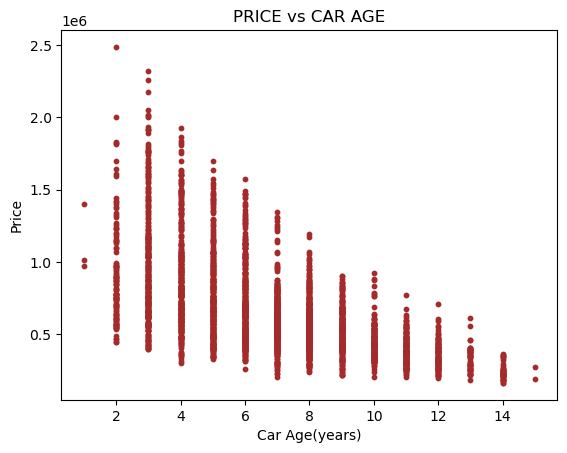

In [77]:
plt.scatter(df['car_age'],df['price'], color='brown', s=10)
plt.title('PRICE vs CAR AGE')
plt.xlabel('Car Age(years)')
plt.ylabel('Price')
plt.show()

This graph shows that as the age of the car increases, the price generally decreases. Newer cars are more expensive, while older cars tend to be cheaper. A few exceptions exist where older cars have higher prices, likely due to brand or condition.


<h4 style="color:red">Price vs Km Driven</h4>

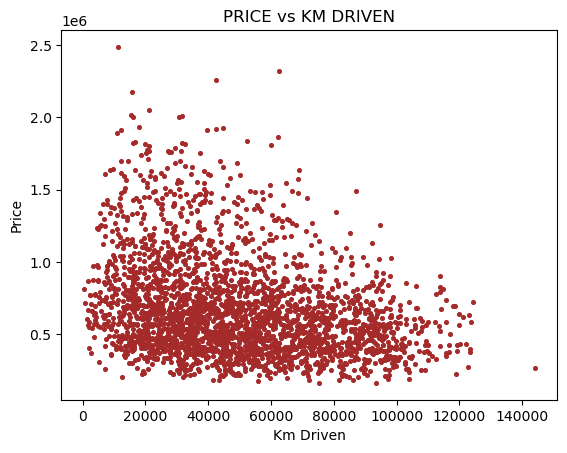

In [55]:
plt.scatter(df['km_driven'],df['price'], color="brown", s=7)
plt.title("PRICE vs KM DRIVEN")
plt.xlabel('Km Driven')
plt.ylabel('Price')
plt.show()

This scatter plot shows that cars with lower kilometers driven generally have a higher resale price, while heavily-used cars (with high mileage) tend to be priced much lower. This suggests that mileage is a key factor that affects a vehicle’s resale value.


<h4 style="color:red">Price by Fuel Type</h4>

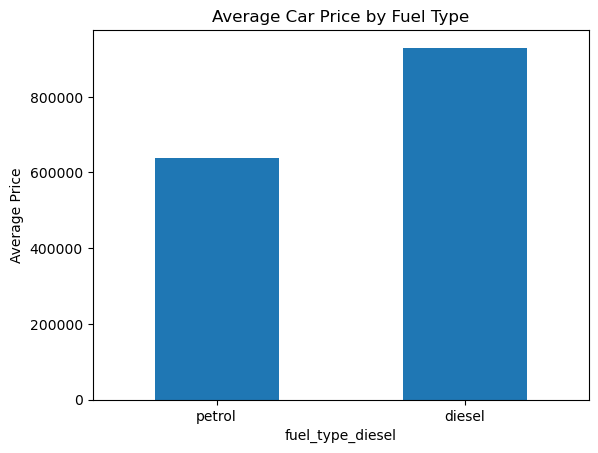

In [58]:
df.groupby('fuel_type_diesel')['price'].mean()
df.groupby('fuel_type_diesel')['price'].mean().plot(kind='bar')
plt.ylabel('Average Price')
plt.xticks([0,1],['petrol','diesel'], rotation=0)
plt.title('Average Car Price by Fuel Type')
plt.show()

Diesel cars retain more value than petrol cars, as shown by their higher average resale price.


<h4 style="color:red">Price by Engine Category</h4>

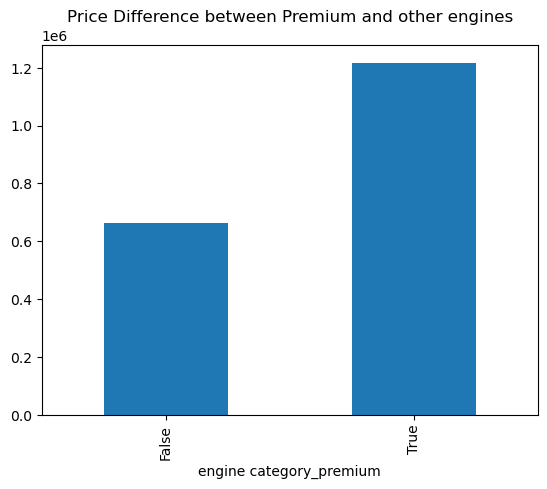

In [60]:
df.groupby('engine category_premium')['price'].mean().plot(kind='bar')
plt.title('Price Difference between Premium and other engines')
plt.show()

The bar chart shows a direct relationship between engine capacity and resale price. Premium engine cars exhibit the highest average price, indicating that buyers are willing to pay more for vehicles with higher performance capabilities. Small and mid-sized engines fall into lower price brackets, reflecting lower power and possibly lower perceived value.

<h4 style="color:red">Price by Owner Count</h4>

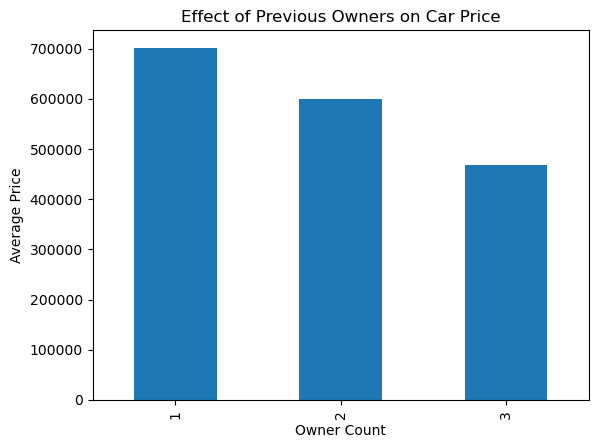

In [62]:
df.groupby('owner_count')['price'].mean().plot(kind='bar')
plt.xlabel('Owner Count')
plt.ylabel('Average Price')
plt.title('Effect of Previous Owners on Car Price')
plt.show()

Cars with fewer previous owners generally have a higher resale price. First-owner cars are valued the most, while cars that have had multiple owners show noticeably lower prices. This suggests that ownership history strongly affects buyer trust and perceived vehicle condition.


<h4 style="color:red">Histogram: Distribution of Car Prices</h4>


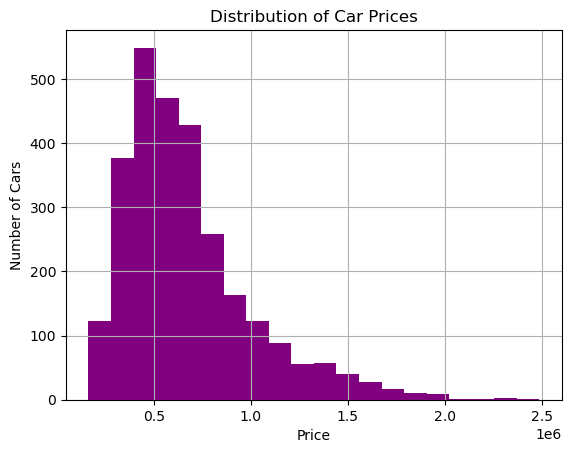

In [73]:
df['price'].hist(bins=20, color="purple")
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Prices')
plt.show()

Most cars fall into the lower price range, with fewer cars in the high price segment.

<h4 style="color:red">Distribution of Vehicle Mileage</h4>

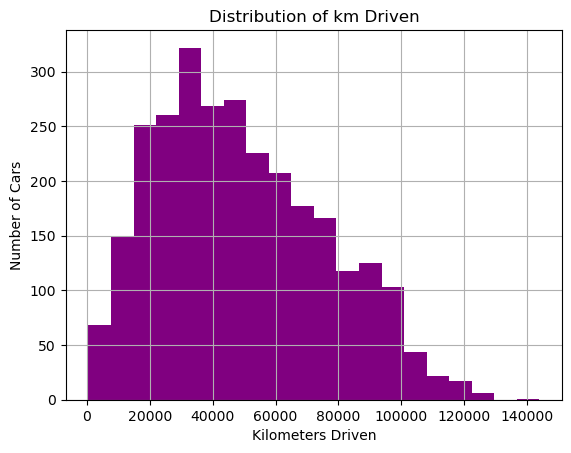

In [75]:
df['km_driven'].hist(bins=20, color="purple")
plt.xlabel('Kilometers Driven')
plt.ylabel('Number of Cars')
plt.title('Distribution of km Driven')
plt.show()

Most cars have moderate mileage, and very high-km cars are rare.


<h4 style="color:red">Price Spread by Owner Count</h4>

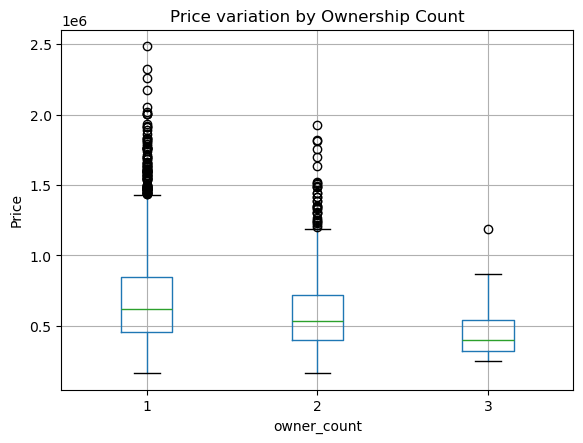

In [76]:
df.boxplot(column='price', by='owner_count')
plt.ylabel('Price')
plt.title('Price variation by Ownership Count')
plt.suptitle('')
plt.show()

The box plot shows that first-owner cars generally have the highest price range, with a higher median price compared to second and third owner cars. As the number of owners increases, the price reduces and the spread widens, indicating greater variability in car value for multi-owner vehicles.


<h3 style="color:red">6. Final Insights And Conclusion</h3>

From analysis of the pre-owned cars dataset, several clear patterns were understandable:

- **Car Age and Price:** Newer cars command significantly higher resale prices, showing a strong negative correlation between vehicle age and market value.
- **Mileage Influence:** Cars with lower kilometers driven are priced higher, indicating that mileage is a major determinant of perceived car quality and condition.
- **Engine Capacity Impact:** Cars with larger or premium engine categories tend to have higher prices, reflecting consumer willingness to pay more for performance and power.
- **Fuel Type Effect:** Diesel vehicles generally retain value better than petrol and CNG cars, likely due to fuel economy and durability of diesel engines.
- **Ownership History:** Cars owned by fewer previous owners (especially first-owner vehicles) sell for higher prices, confirming buyer preference for single-owner cars.
- **Price Distribution:** Most cars fall within a mid-price range, with a smaller number of premium-priced outliers representing luxury or high-performance models.
  
Overall, the resale pricing of used cars is driven by a combination of **age, mileage, engine size, fuel type, and ownership history**. These factors align with practical buyer considerations in the real-world used car market.


<h3 style="color:red">Export the Cleaned Dataset</h3>

In [72]:
df.to_csv("PreOwnedCars_cleaned.csv",index=False)

In [69]:
df.head()

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,overall_cost,spare_key,title,...,fuel_type_petrol,engine category_mid,engine category_large,engine category_premium,engine_capacity_scaled,km_driven_scaled,price_scaled,overall_cost_scaled,cost_per_km_scaled,car_age_scaled
0,mahindra,thar lx d 4wd mt convertible,2020.0,2184.0,11003.0,1st owner,1231000,23431.0,no,2020 mahindra thar lx d 4wd mt convertible,...,False,False,False,True,0.753623,0.073519,0.459552,0.447863,0.061017,0.285714
1,hyundai,verna 1.6 vtvt sx,2018.0,1591.0,66936.0,1st owner,786000,15359.0,no,2018 hyundai verna 1.6 vtvt sx,...,True,False,True,False,0.467150,0.463185,0.268072,0.261438,0.005538,0.428571
2,tata,harrier xt plus 2.0l kryotec dark editon,2022.0,1956.0,27990.0,1st owner,1489000,28349.0,no,2022 tata harrier xt plus 2.0l kryotec dark ed...,...,False,False,True,False,0.643478,0.191862,0.570568,0.561445,0.028506,0.142857
3,honda,city 1.5l i-vte v cvt,2023.0,1498.0,5061.0,1st owner,1227000,23355.0,yes,2023 honda city 1.5l i-vte v cvt,...,True,True,False,False,0.422222,0.032123,0.457831,0.446107,0.133355,0.071429
4,ford,ecosport titanium 1.5l diesel,2021.0,1498.0,23480.0,1st owner,887000,16883.0,no,2021 ford ecosport titanium 1.5l diesel,...,False,True,False,False,0.422222,0.160442,0.311532,0.296635,0.019962,0.214286


In [74]:
df.to_csv("PreOwnedcars_cleaned.csv",index=False)